# Modeling

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
team_df = pd.read_csv('/data/JakeOliver28/teams.csv')

In [3]:
team_df.head()

,Unnamed: 0,WinPercentage,PassYards,PassAttempts,PercentOnPaceRuns,RushYards,Sacks,ForcedFumbles,InterceptionThrown,EPAPerPlay,DefEPAPerPlay
0,ARI2009,0.714286,4222.0,587.0,0.462687,1484.0,42,15,20,0.013203,-0.044167
1,ARI2010,0.100000,3161.0,558.0,0.424920,1367.0,34,24,19,-0.126148,0.022802
2,ARI2011,0.416667,3992.0,594.0,0.485175,1578.0,42,14,12,-0.090028,-0.041771
3,ARI2012,0.400000,3791.0,674.0,0.372032,1344.0,42,17,24,-0.156911,-0.081527
4,ARI2013,0.571429,4400.0,608.0,0.417910,1567.0,47,20,21,-0.007928,-0.054623


In [4]:
y = team_df['WinPercentage']
X = team_df[['PassYards', 'PassAttempts', 'PercentOnPaceRuns', 'RushYards', 'Sacks', 'ForcedFumbles', \
            'InterceptionThrown', 'EPAPerPlay', 'DefEPAPerPlay']]

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=0.3)

In [6]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

### Overfitted Model (Linear Regression)

In [7]:
model1 = make_pipeline(PolynomialFeatures(3),
                      LinearRegression())
model1.fit(Xtrain, ytrain)
ypred_test1 = model1.predict(Xtest)
ypred_train1 = model1.predict(Xtrain)

In [8]:
print("Training Score: ", r2_score(ypred_train1, ytrain))
print("Test Score: ", r2_score(ypred_test1, ytest))

Training Score:  0.9999999033197662
Test Score:  -0.039194338830812026


### Less Predictors

In [9]:
X = team_df[['EPAPerPlay', 'PercentOnPaceRuns', 'PassYards', 'DefEPAPerPlay']]

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, test_size=0.3)

In [11]:
model2 = make_pipeline(PolynomialFeatures(3),
                      RandomForestRegressor(n_estimators=10))
model2.fit(Xtrain, ytrain)
ypred_test2 = model2.predict(Xtest)
ypred_train2 = model2.predict(Xtrain)

In [12]:
print("Training Score: ", r2_score(ypred_train2, ytrain))
print("Test Score: ", r2_score(ypred_test2, ytest))
print("Accuracy: {}".format(model2.score(Xtest, ytest)))

Training Score:  0.9396462713197955
Test Score:  0.5759101635717014
Accuracy: 0.711253310936465


In [13]:
model3 = make_pipeline(PolynomialFeatures(3),
                      LinearRegression())
model3.fit(Xtrain, ytrain)
ypred_test3 = model3.predict(Xtest)
ypred_train3 = model3.predict(Xtrain)

In [14]:
print("Training Score: ", r2_score(ypred_train3, ytrain))
print("Test Score: ", r2_score(ypred_test3, ytest))
print("Accuracy: {}".format(model3.score(Xtest, ytest)))

Training Score:  0.777728378857024
Test Score:  0.5932909611088243
Accuracy: 0.6786536165049565


### Final Model

Linear regression with using polynomial features of 1 yielded the best model.

In [15]:
model4 = make_pipeline(PolynomialFeatures(1),
                      LinearRegression())
model4.fit(Xtrain, ytrain)
ypred_test4 = model4.predict(Xtest)
ypred_train4 = model4.predict(Xtrain)

In [16]:
print("Training Score: ", r2_score(ypred_train4, ytrain))
print("Test Score: ", r2_score(ypred_test4, ytest))
print("Accuracy: {}".format(model4.score(Xtest, ytest)))

Training Score:  0.7541740951967002
Test Score:  0.7572258067091906
Accuracy: 0.8084156324455937


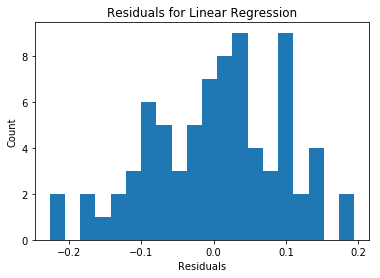

In [17]:
residuals = ytest - ypred_test4
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals for Linear Regression')
plt.show()